<a href="https://colab.research.google.com/github/CodeWithSridhar/Innomatics-Internship/blob/main/Task13_KNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-13 
# ⚛ KNN from Scratch ⚛

# Problem Statement

Task - Predict the diamond price.💎

Dataset - https://drive.google.com/file/d/1kfUGoT_E9GmufFvMhd5Jc0qcCzSI9usj/view?usp=sharing

Write the KNN code from scratch and make it work on the given dataset ?

    Step - 1: Load the data
    Step - 2: Perform the EDA on the given dataset
    Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)
    Step - 4: Normalise the data
    Step - 5: Split the data - Test and Train (recommended 75:25 split)
    Step - 6: Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here.Write the complete code implementation on KNN.
    Step - 7: Evaluate your model
    Step - 8: Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation

# Data Description

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeWithSridhar/Innomatics-Internship/main/diamonds.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Here we can notice that min value of "x", "y", "z" are zero. 


This indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds in our dataset.

In [8]:
#Dropping dimensionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [9]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


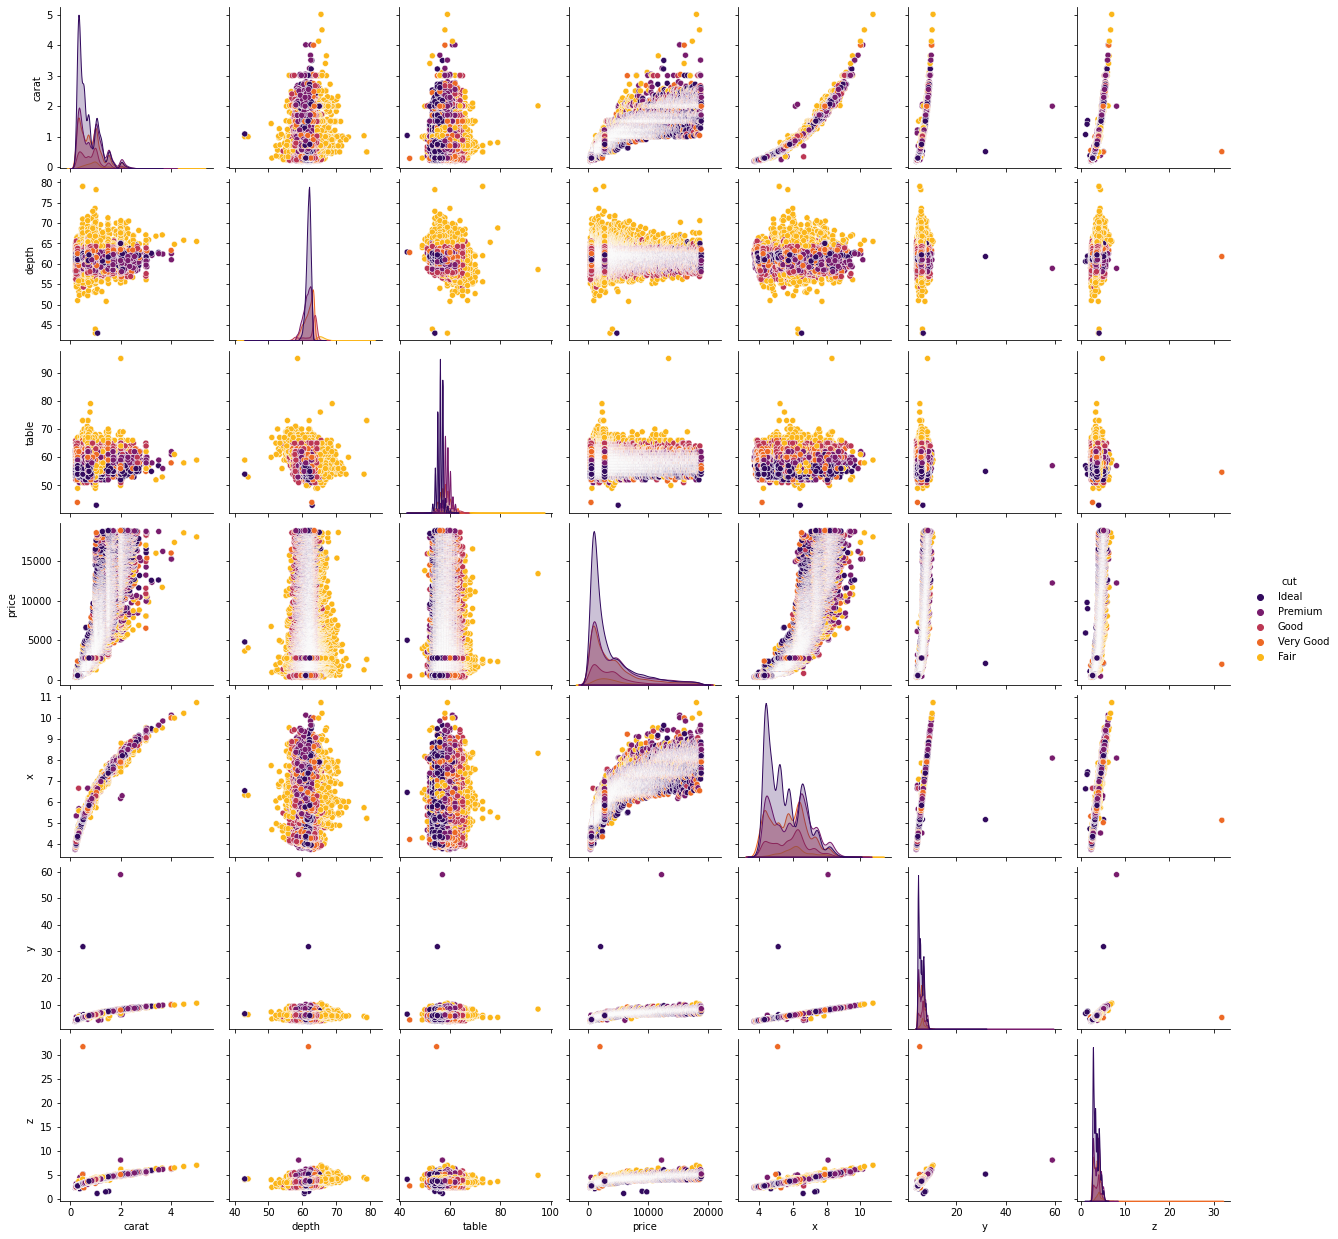

In [10]:
# Pairplot
ax=sns.pairplot(data, hue= "cut", palette= 'inferno')

From here we can conclude that outliers are present in our dataset.


## Regression plot to get a close look at the outliers

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

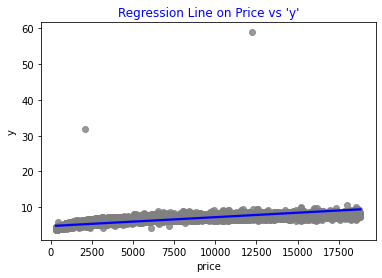

In [15]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True, scatter_kws={"color": 'grey'}, line_kws={"color": 'blue'})
ax.set_title("Regression Line on Price vs 'y'", color='blue')

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

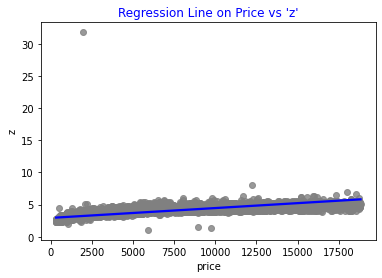

In [16]:
ax= sns.regplot(x="price", y="z", data=data, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'z'", color="blue")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

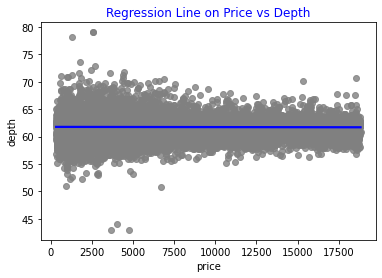

In [17]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Depth", color="b")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

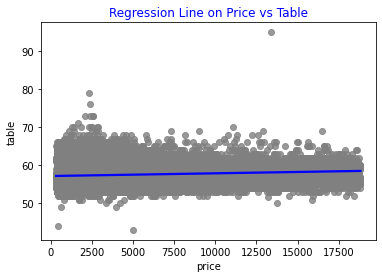

In [18]:
ax=sns.regplot(x="price", y="table", data=data, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "b"})
ax.set_title("Regression Line on Price vs Table", color="b")

In [19]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

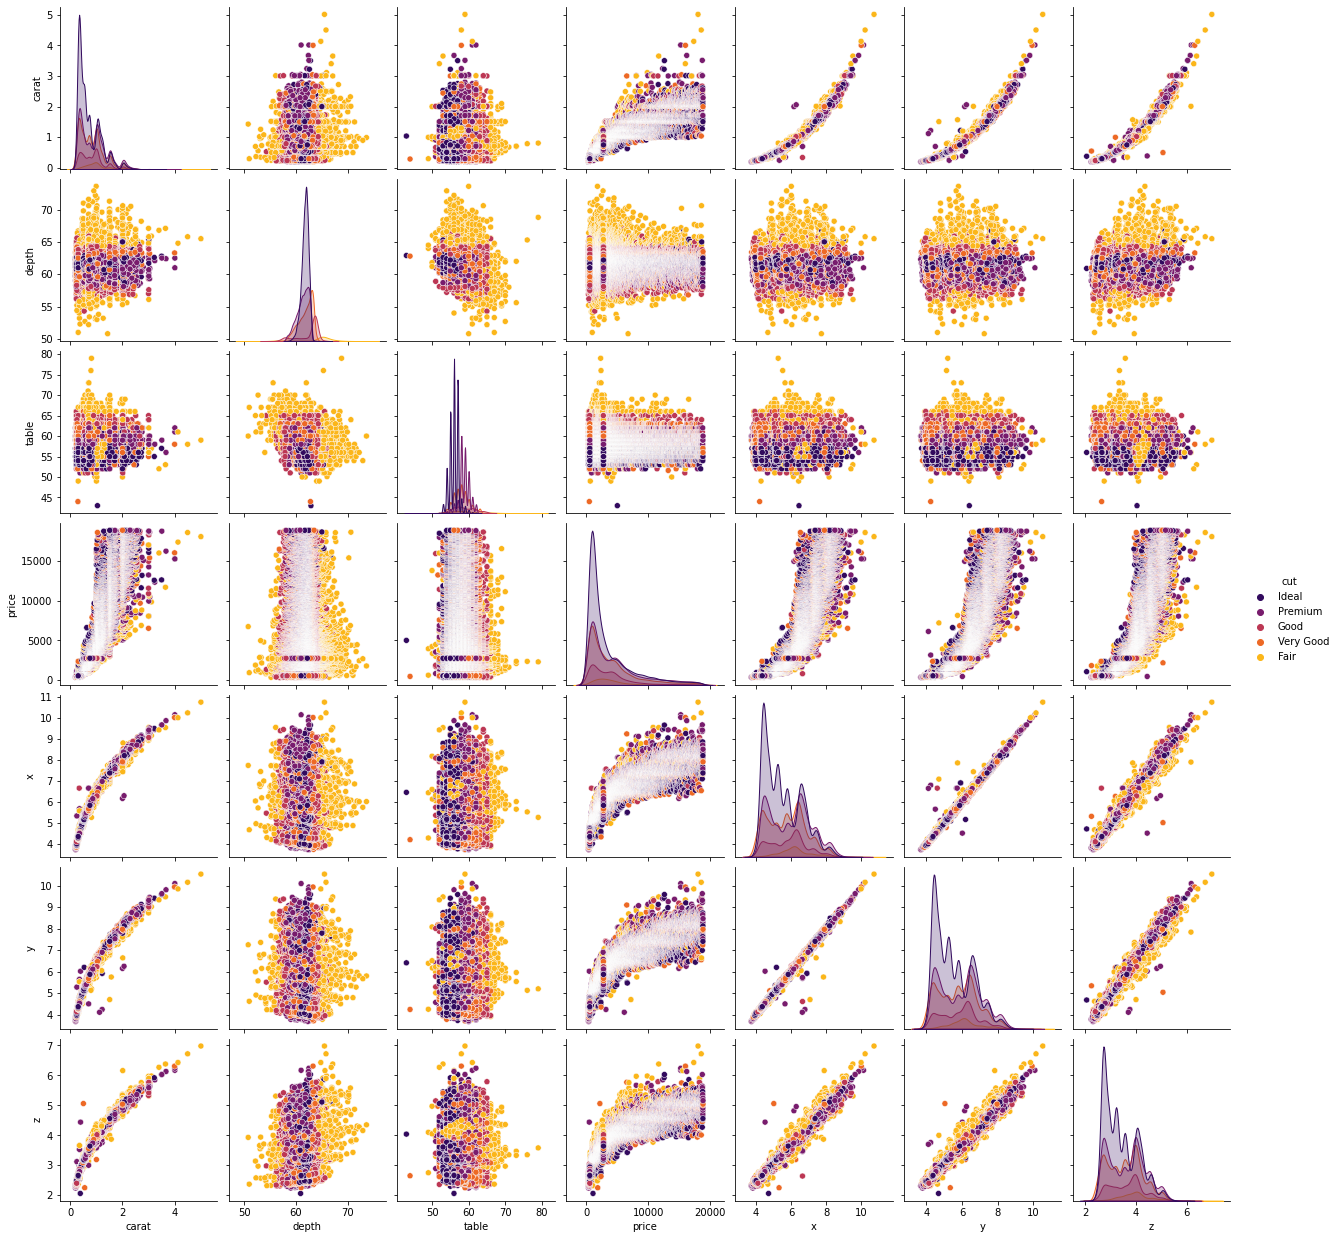

In [20]:
ax=sns.pairplot(data, hue= "cut",palette='inferno')

After removing the outliers we got the much cleaner dataset.

In [21]:
# list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

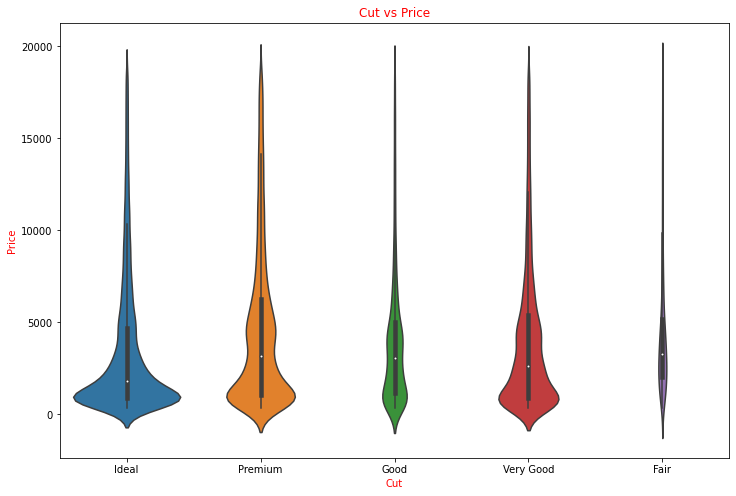

In [26]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=data,scale= "count")
ax.set_title("Cut vs Price", color="r")
ax.set_ylabel("Price", color="r")
ax.set_xlabel("Cut", color="r")

Text(0.5, 0, 'Color')

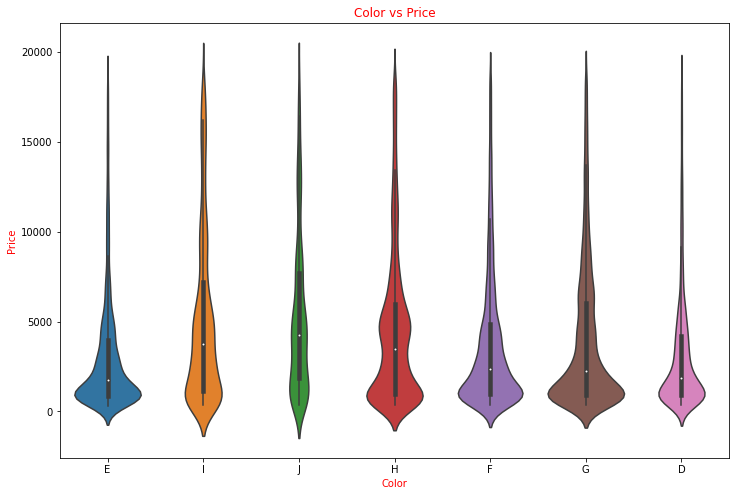

In [27]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data,scale= "count")
ax.set_title("Color vs Price", color="r")
ax.set_ylabel("Price", color="r")
ax.set_xlabel("Color", color="r")

Text(0.5, 0, 'Clarity')

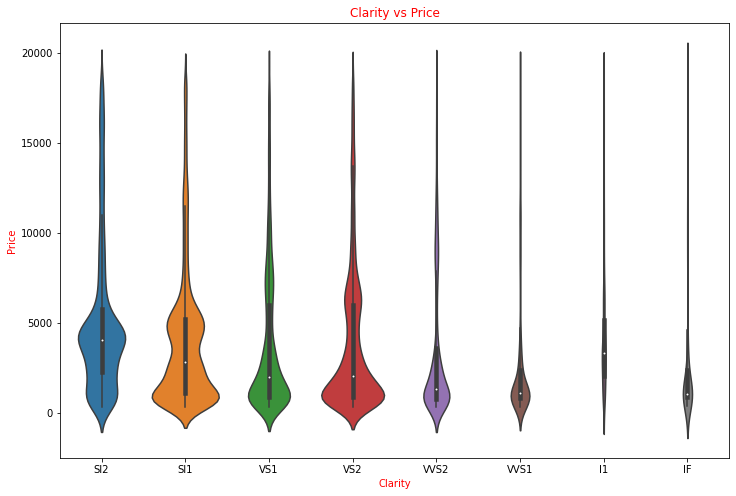

In [28]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=data,scale= "count")
ax.set_title("Clarity vs Price", color="r")
ax.set_ylabel("Price", color="r")
ax.set_xlabel("Clarity", color="r")

# Label Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
# Creating a copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [32]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


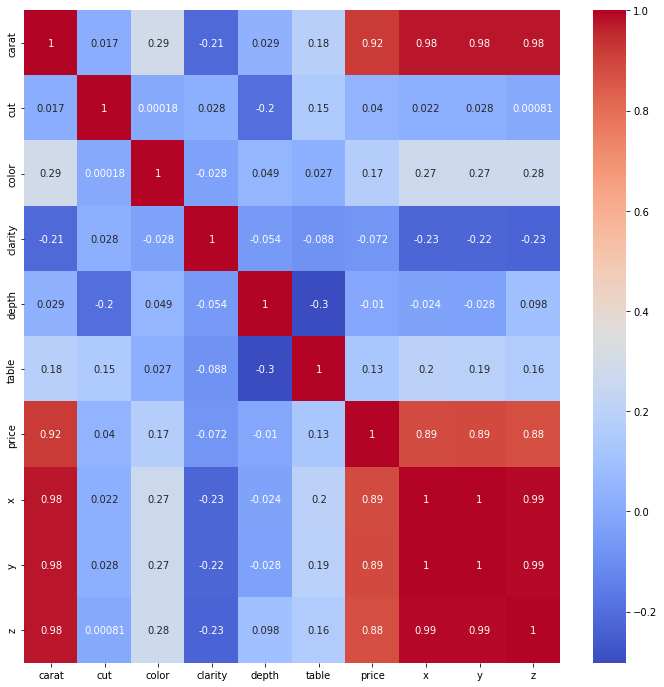

In [36]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap='coolwarm',annot=True)